In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
x_train = train[['LotArea']]
y_train = train[["SalePrice"]]
x_test = test[['LotArea']]

selected_model = LinearRegression()
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

# The coefficients
print("Coefficients: \n", selected_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color="black")
plt.xlabel("Lot Sizes")
plt.ylabel("Predicted Prices")
plt.title("Lot Size vs Predicted House Prices")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.show()

Coefficients: 
 [[2.09997195]]


NameError: name 'y_test' is not defined

Coefficients:  [[11.54861192]]
Intercept:  [72686.47585323]
Mean squared error: 4527512548.137
Coefficient of determination: 0.120


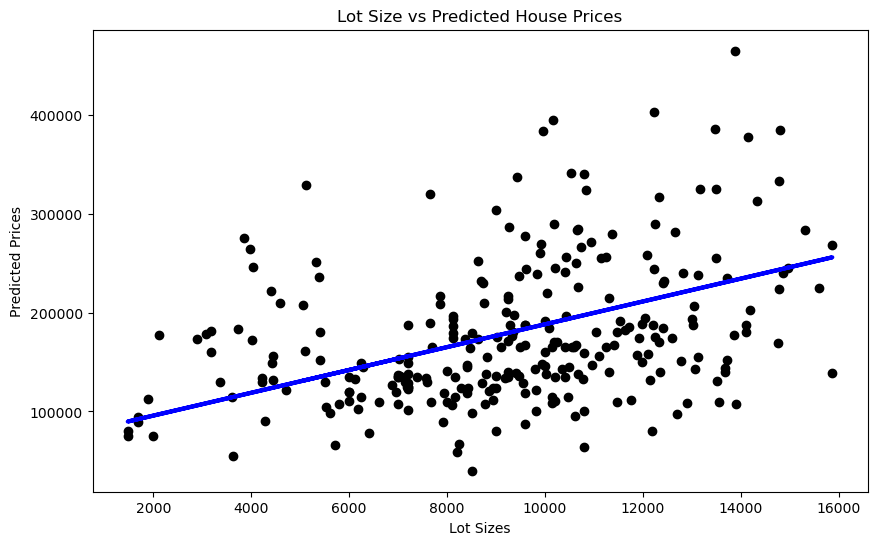

In [ ]:
x_data = train[['LotArea']]
y_data = train[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

selected_model = LinearRegression()
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# The coefficients
print("Coefficients: ", selected_model.coef_)
# The intercept
print("Intercept: ", selected_model.intercept_)
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color="black")
plt.xlabel("Lot Sizes")
plt.ylabel("Predicted Prices")
plt.title("Lot Size vs Predicted House Prices")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.show()

In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train = train.drop(train['LotArea'].nlargest(50).index)

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Coefficients:  [[11.54861192]]
Intercept:  [72686.47585323]
Mean squared error: 4527512548.137
Coefficient of determination: 0.120


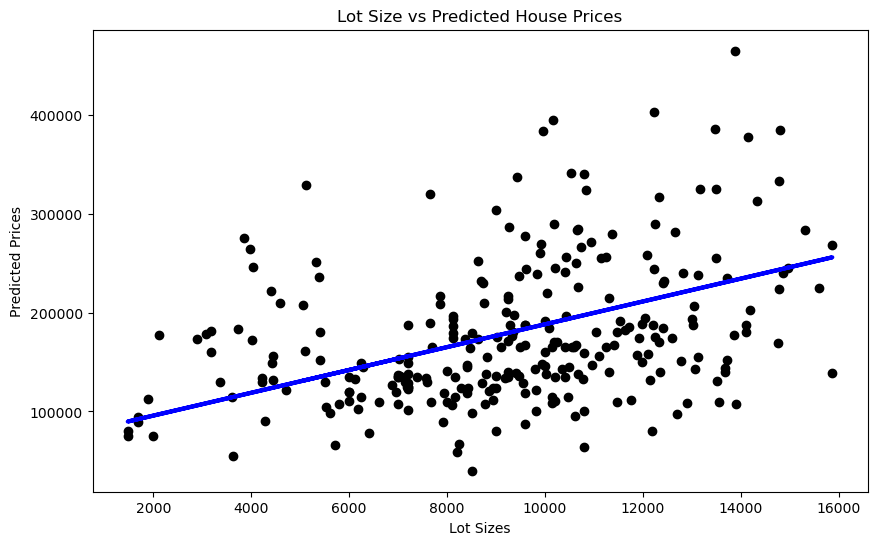

In [ ]:
x_data = train[['LotArea']]
y_data = train[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

selected_model = LinearRegression()
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# The coefficients
print("Coefficients: ", selected_model.coef_)
# The intercept
print("Intercept: ", selected_model.intercept_)
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color="black")
plt.xlabel("Lot Sizes")
plt.ylabel("Predicted Prices")
plt.title("Lot Size vs Predicted House Prices")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.show()

In [ ]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.013447,-0.027198,-0.021222,-0.018004,0.012003,-0.020606,-0.024878,-0.055222,-0.009502,...,-0.025751,-0.002633,0.006552,-0.051586,-0.007933,0.035255,-0.026505,0.018241,0.000072,-0.013812
MSSubClass,0.013447,1.000000,-0.451684,-0.460228,0.038540,-0.063530,0.032346,0.048383,0.027383,-0.073136,...,-0.026122,0.004541,-0.015842,-0.041209,-0.026162,-0.006166,-0.023361,-0.005813,-0.015760,-0.085665
LotFrontage,-0.027198,-0.451684,1.000000,0.693366,0.266129,-0.066102,0.168416,0.099809,0.203508,0.167698,...,0.127451,0.125888,-0.012010,0.078794,0.063189,0.085847,0.003943,0.019921,0.018597,0.416850
LotArea,-0.021222,-0.460228,0.693366,1.000000,0.246753,-0.030149,0.102809,0.080069,0.163304,0.180951,...,0.173012,0.120827,-0.014316,0.058760,0.102152,0.041751,0.042915,0.011000,-0.015662,0.437573
OverallQual,-0.018004,0.038540,0.266129,0.246753,1.000000,-0.112286,0.592931,0.554833,0.393347,0.218432,...,0.235514,0.317260,-0.129624,0.028349,0.067447,0.040021,-0.024044,0.077104,-0.015376,0.808670
OverallCond,0.012003,-0.063530,-0.066102,-0.030149,-0.112286,1.000000,-0.372710,0.065562,-0.130238,-0.038853,...,-0.015337,-0.041943,0.089266,0.008442,0.050465,0.004898,0.089096,-0.011779,0.033894,-0.107614
YearBuilt,-0.020606,0.032346,0.168416,0.102809,0.592931,-0.372710,1.000000,0.603210,0.315651,0.257245,...,0.234456,0.206269,-0.401713,0.027543,-0.032708,0.016050,-0.041763,0.018892,-0.007179,0.567838
YearRemodAdd,-0.024878,0.048383,0.099809,0.080069,0.554833,0.065562,0.603210,1.000000,0.175053,0.124290,...,0.218790,0.235060,-0.197852,0.036205,-0.030147,0.013614,-0.004290,0.022141,0.044534,0.534979
MasVnrArea,-0.055222,0.027383,0.203508,0.163304,0.393347,-0.130238,0.315651,0.175053,1.000000,0.225679,...,0.143521,0.112965,-0.119158,0.017297,0.077064,-0.017605,-0.028900,0.009440,0.005258,0.453787
BsmtFinSF1,-0.009502,-0.073136,0.167698,0.180951,0.218432,-0.038853,0.257245,0.124290,0.225679,1.000000,...,0.188889,0.059143,-0.121064,0.035455,0.086909,0.071622,0.002219,0.001849,0.026576,0.390012


Coefficients:  [[44379.87767098]]
Intercept:  [-90233.22290028]
Mean squared error: 2681026163.509
Coefficient of determination: 0.650


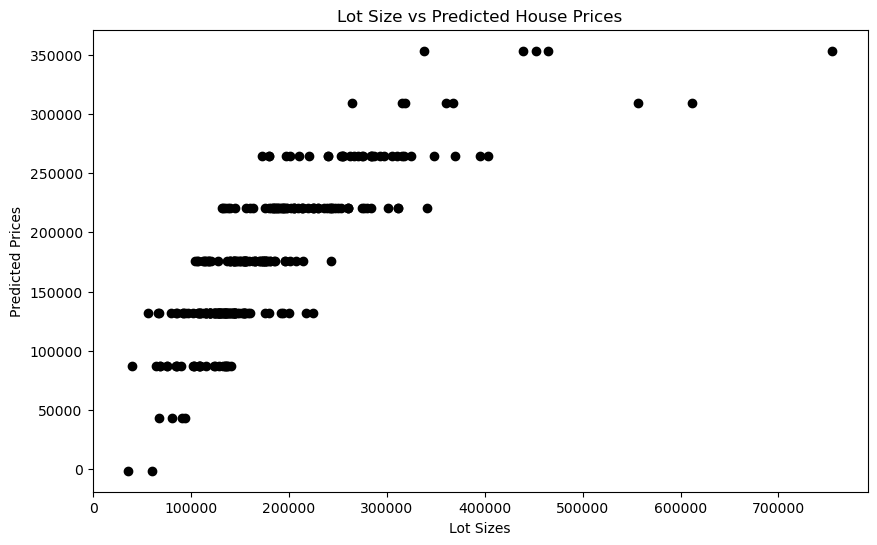

In [13]:
x_data = train[['OverallQual']]
y_data = train[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

selected_model = LinearRegression()
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# The coefficients
print("Coefficients: ", selected_model.coef_)
# The intercept
print("Intercept: ", selected_model.intercept_)
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color="black")
plt.xlabel("Lot Sizes")
plt.ylabel("Predicted Prices")
plt.title("Lot Size vs Predicted House Prices")
plt.show()

Coefficients:  [[7.64455110e-01 2.73129721e+04 4.08015456e+01 1.32914061e+04
  3.27734145e+01 1.57417481e+03]]
Intercept:  [-98021.66094866]
Mean squared error: 1787256872.480
Coefficient of determination: 0.767


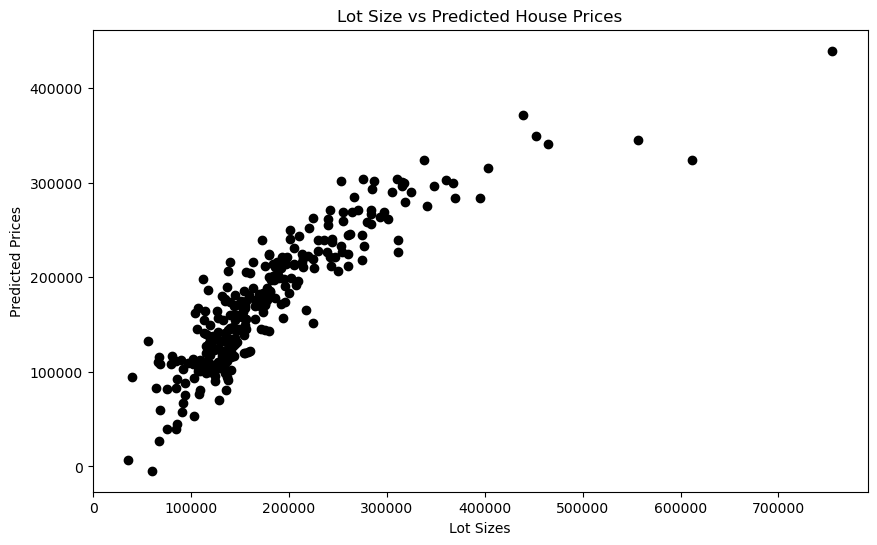

In [20]:
x_data = train[['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath']]
y_data = train[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

selected_model = LinearRegression()
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

# The coefficients
print("Coefficients: ", selected_model.coef_)
# The intercept
print("Intercept: ", selected_model.intercept_)
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color="black")
plt.xlabel("Lot Sizes")
plt.ylabel("Predicted Prices")
plt.title("Lot Size vs Predicted House Prices")
plt.show()

In [ ]:
y = (0.764455110*('LotArea')) + (0.000273129721*('OverallQual')) + (0.408015456*('GrLivArea'))
+ (0.000132914061*('GarageCars')) + (0.327734145*('GarageArea')) + (0.00157417481*('FullBath')) -98021.66094866